# Ejercicio 1 - Preparar el ambiente de trabajo

In [139]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os 

import warnings

warnings.simplefilter('ignore')
plt.rcParams['figure.figsize'] = (10,6)
plt.style.use('seaborn')

from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

Carga de archivos

In [140]:
all_files = [i for i in glob.glob('dump/*.{}'.format('csv'))]
csv_concat = pd.concat([pd.read_csv(f) for f in all_files], sort=False, ignore_index=True)
df = pd.DataFrame(csv_concat).drop(columns='Unnamed: 0')
df.columns = ['artist', 'genre', 'song', 'lyric']

Archivo final

In [141]:
df.head()

,artist,genre,song,lyric
0,Anthrax,metal,Deathrider,"Riding hard, high in the saddle \n Winged stee..."
1,Anthrax,metal,Metal Thrashing Mad,Racing down the road \n In a street machine of...
2,Anthrax,metal,I'm Eighteen,Lines form on my face and hands \n Lines form ...
3,Anthrax,metal,Panic,Move it to the front \n Reaching for the light...
4,Anthrax,metal,Subjugator,Out in the streets \n We're fighting tonight \...


# Ejercicio 2 - Descripción de los datos

## Genere dos gráficos de barras que resumen la siguiente informacion:
    * La cantidad de canciones registradas por cada artista, ordenado de mayor a menor

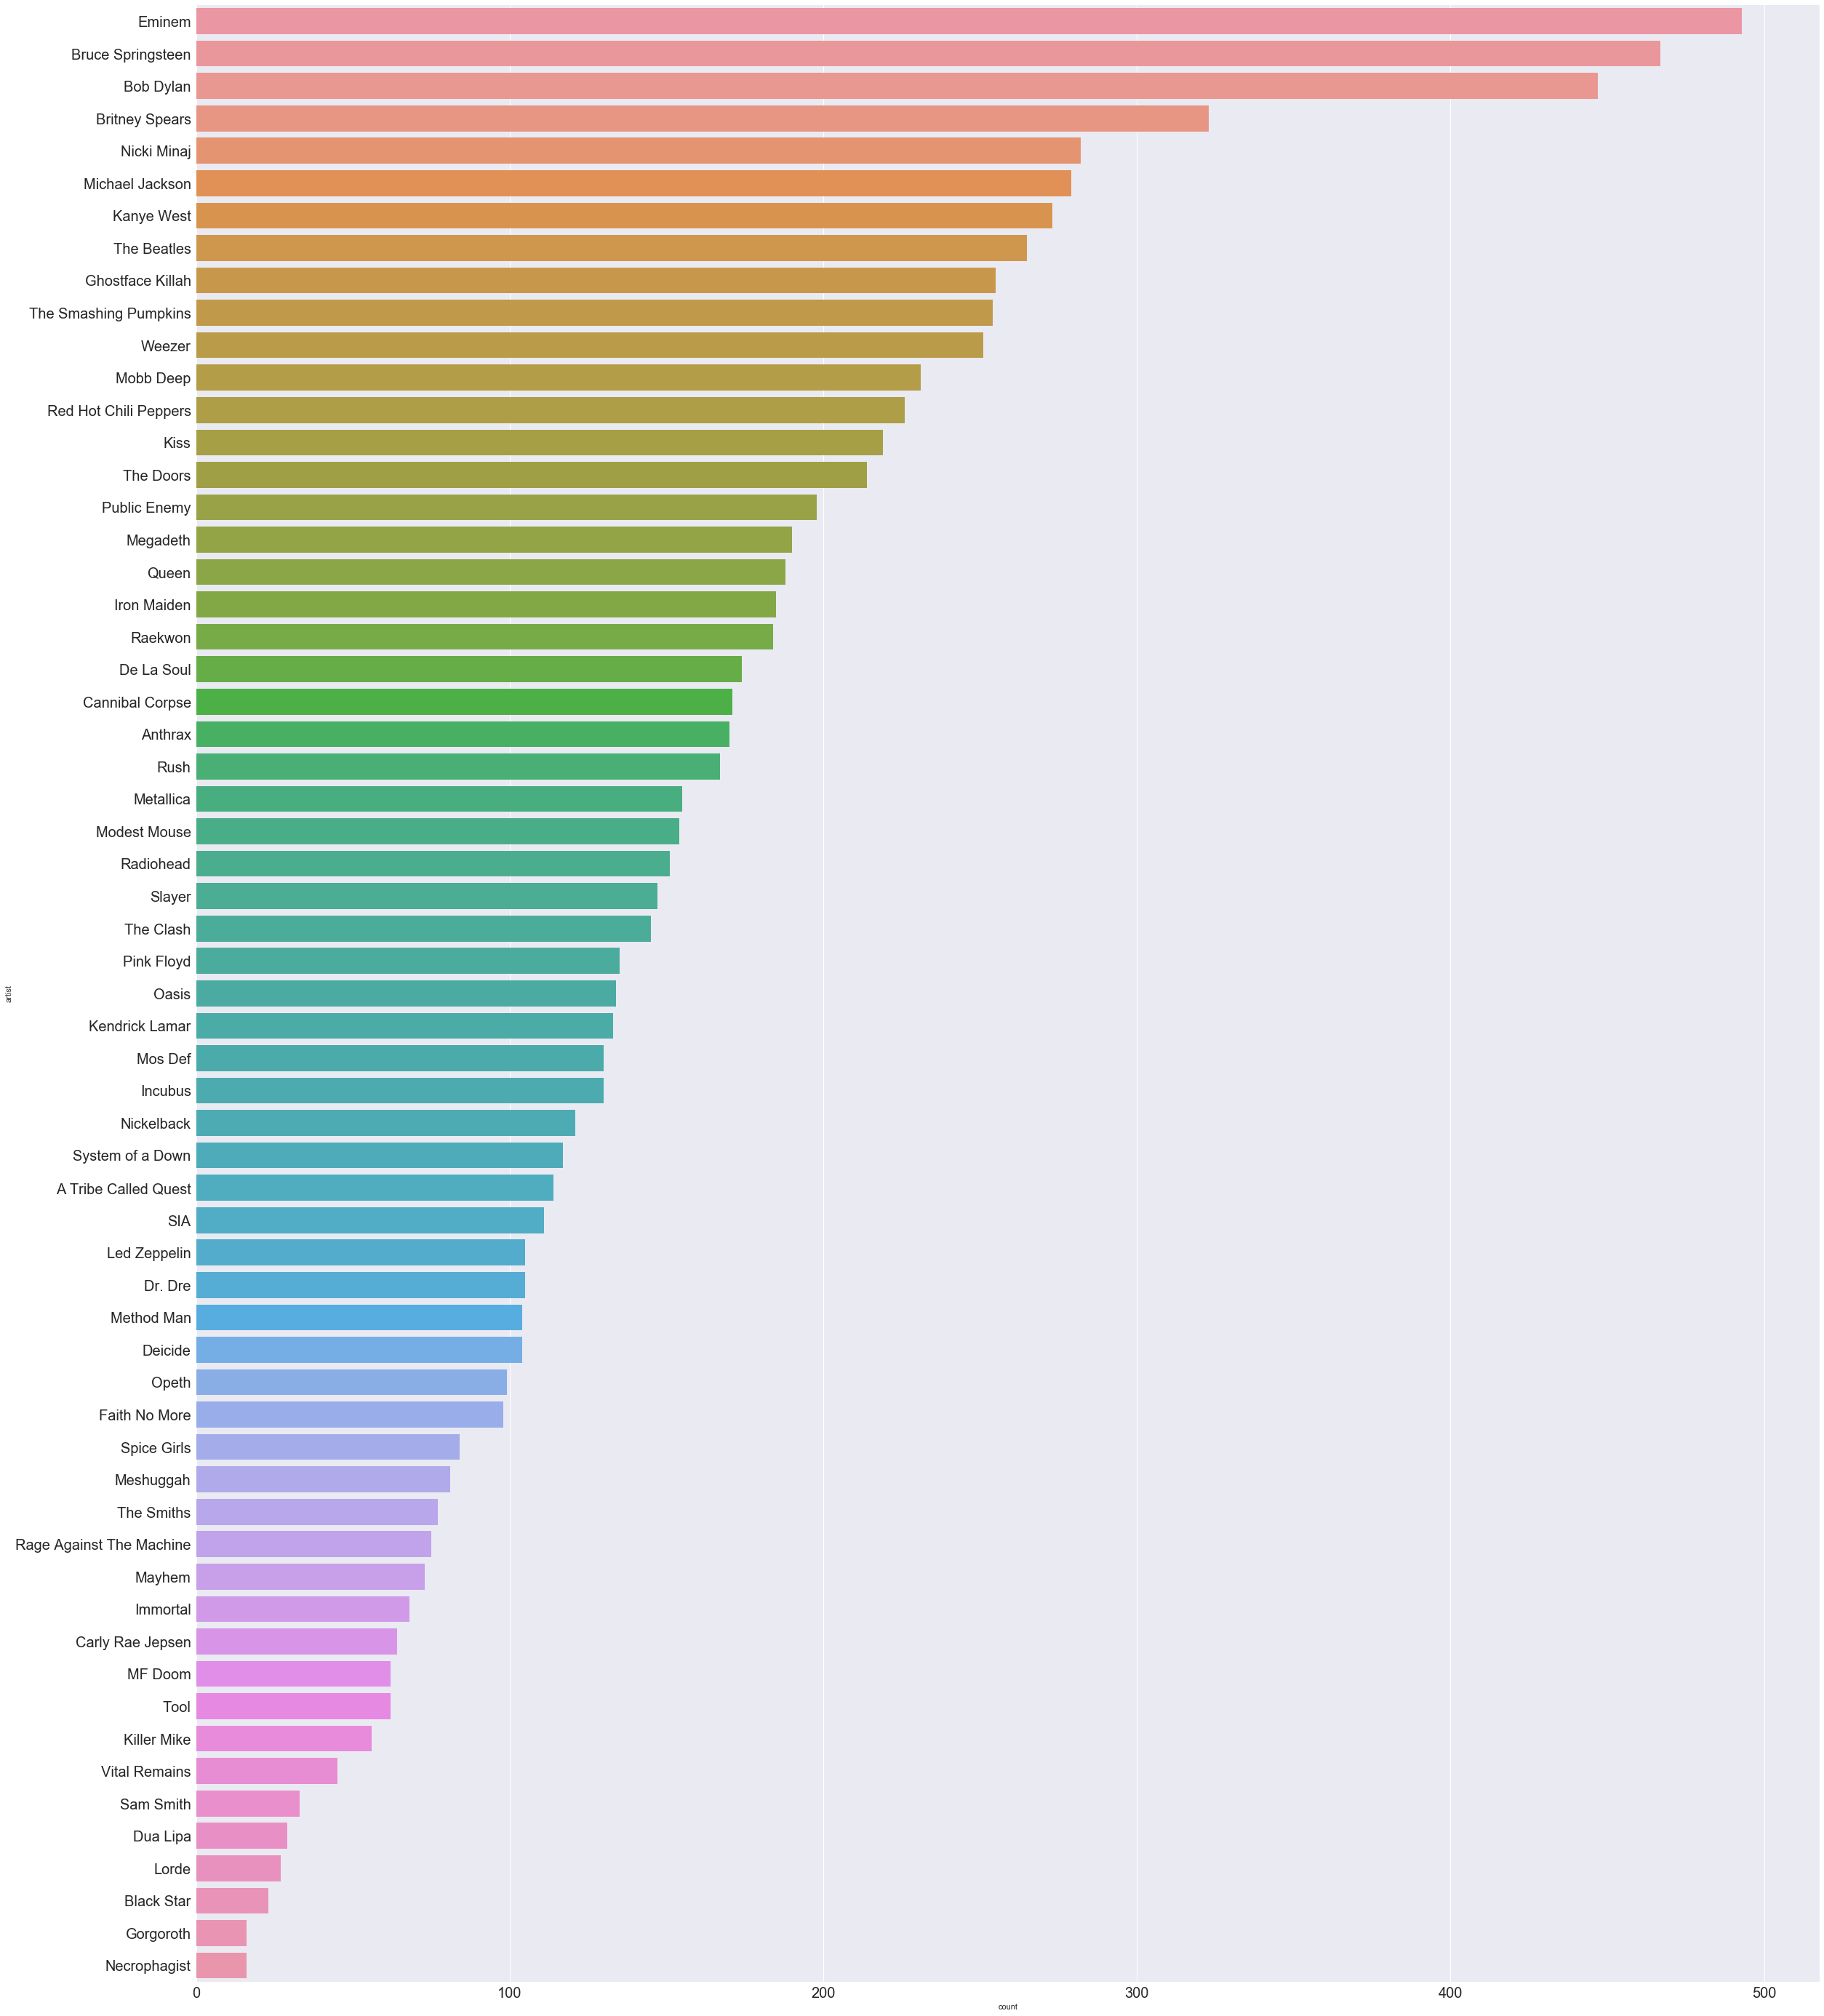

In [142]:
plt.figure(figsize=(40,50))
chart = sns.countplot(y='artist', data=df, order = df['artist'].value_counts().index)
chart.tick_params(labelsize=20)

    * La cantidad de canciones registradas en cada género, ordenados de mayor a menor

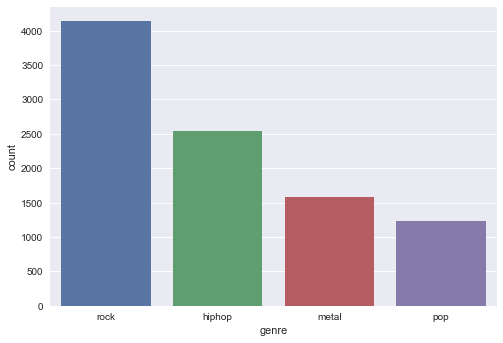

In [143]:
sns.countplot(x='genre', data=df, order = df['genre'].value_counts().index)

### Comentarios:
* Los tres artistas que destacan con la mayor cantidad de canciones son: Eminem, Bruce Springsteen y Bob Dylan; siendo estos tres artistas los únicos del listado que tienen más de 400 canciones.
* En relación a los generos de música, el rock lidera la lista teniendo mas de 4.000 canciones, siguiendole el hiphop con cerca de 2.500. El rock supera en el doble de canciones al metal y al pop. 

# Ejercicio 3 - Matriz de Ocurrencias

Importar la clase CountVectorizer dentro de los modulos feature_extraction.text de la librería sklearn. Lea la documentación asociada a esta. ¿Cuál es el objetivo de esta clase?

* El objetivo de esta clase es poder tokenizar las palabras que contiene el texto que se va a trabajar. Luego estas palabras son codificadas como números para ser usados como variables de entrada para usarlos en machine learning. 

Aplique la clase para extraer las 100 palabras más repetidas en toda la base de datos

In [144]:
count_vectorizer = CountVectorizer(stop_words='english')
count_vectorizer_fit = count_vectorizer.fit_transform(df['lyric'])
words = count_vectorizer.get_feature_names()
words_freq = count_vectorizer_fit.toarray().sum(axis=0)

data = {'palabra': words, 'frecuencia': words_freq}

In [145]:
df_palabras = pd.DataFrame(data).sort_values('frecuencia', ascending=False).head(100)
df_palabras

,palabra,frecuencia
24950,like,19629
12859,don,17398
23856,know,14962
18439,got,14171
23287,just,13978
...,...,...
11041,death,1897
24615,left,1895
43442,thing,1882
14305,end,1829


Genere una funcion que replique el procedimiento para cada uno de los generos

In [146]:
df['genre'].unique()

array(['metal', 'hiphop', 'rock', 'pop'], dtype=object)

In [147]:
def words_by_gender(df, cantidad=100):
    genres = df['genre'].unique()
    list = []
    for i in genres:
        df_temp = df.loc[df['genre'] == i].copy()
        lista_de_textos = np.array(df_temp['song'])
        count_vectorizer = CountVectorizer(stop_words='english')
        count_vectorizer_fit = count_vectorizer.fit_transform(lista_de_textos)
        words = count_vectorizer.get_feature_names()
        words_freq = count_vectorizer_fit.toarray().sum(axis=0)
        data = {'Categoría ' + i: words, 'frecuencia': words_freq}
        df_palabras = pd.DataFrame(data).sort_values('frecuencia', ascending=False).head(cantidad)
        list.append(df_palabras)
    return list

In [148]:
Metal, Hip_Hop, Rock, Pop = words_by_gender(df)

In [149]:
Metal.head(20)

,Categoría metal,frecuencia
431,death,27
164,black,23
741,god,18
429,dead,17
1858,world,17
1681,time,16
812,hell,15
479,die,15
186,blood,14
1039,man,13


In [150]:
Hip_Hop

,Categoría hiphop,frecuencia
1649,remix,81
800,freestyle,61
1220,love,43
215,black,24
1184,like,23
...,...,...
671,eminem,6
1513,play,6
527,days,6
2192,war,6


In [151]:
Rock

,Categoría rock,frecuencia
1697,love,130
1756,man,60
2671,song,53
2954,time,47
1965,night,47
...,...,...
2734,star,10
970,face,10
267,better,10
1107,free,10


In [152]:
Pop

,Categoría pop,frecuencia
608,love,45
824,remix,36
278,don,23
402,girl,21
1124,world,21
...,...,...
703,need,4
1009,tell,4
587,live,4
990,sweet,4


### Comente sobre las principales características de cada género en cuánto a sus palabras:
* En general el estilo metal basa sus letras en la muerte, dios, sangre y oscuridad, generando letras mas bien deprimentes y oscuras. 
* Para el Hip Hop destacamos palabras como remix o freestyle, que podrían referirse a su estilo de música o a su estilo de vida, o palabras como "black" que podrían tener coincidencias raciales, o también love y like que podría indicar su relacion con el amor. 
* Analizando el rock, vemos que hay palabras como love, song, night, time, baby; esto podría indicar su característica de baladas a otra persona.
* Y sobre el pop notamos palabras como Love, remix, girl, world que dan una sensación de que es un estilo enfocado en chicas. 

# Ejercicio 4 - Entrenamiento del modelo

Importe MultinomialNB, train_test_split, Pipeline, confusion_matrix y classificacion_report

In [153]:
from sklearn.pipeline import Pipeline

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.utils.multiclass import unique_labels

Genere las muestras de entrenamiento y validación reservando un 40% para validación y declarando una semilla pseudoaleatoria

In [154]:
X_train, X_test, y_train, y_test = train_test_split(df['lyric'], df['genre'], test_size=0.40, random_state=1781)

Monte el modelo dentro de un Pipeline, donde el primer paso es implementar CountVectorizer y el segundo sea ejecutar el clasificador MultinomialNB

In [155]:
pipeline_model = Pipeline([('vectorizer', CountVectorizer()), ('clf', MultinomialNB())])
pipeline_model.fit(X_train, y_train);

Predicciones y su comparación con datos reales

In [156]:
y_hat = pipeline_model.predict(X_test)

datos = {'y_test': y_test, 'y_hat': y_hat}
df_comparacion = pd.DataFrame(datos)
df_comparacion.sample(10)

,y_test,y_hat
4803,hiphop,hiphop
2330,hiphop,pop
6694,rock,rock
5297,hiphop,hiphop
3385,metal,rock
5213,hiphop,hiphop
2995,hiphop,hiphop
9417,rock,rock
1737,pop,pop
2806,hiphop,hiphop


Confusion Matrix

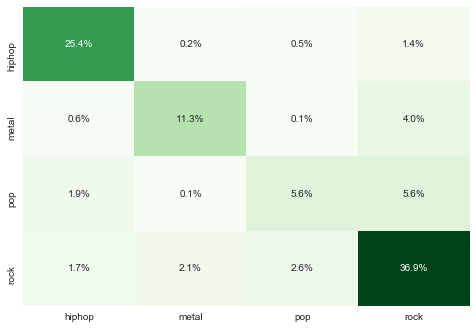

In [157]:
cnf = confusion_matrix(y_test, y_hat) / len(y_test)
target_label = unique_labels(y_test, y_hat)
sns.heatmap(cnf, xticklabels=target_label,
yticklabels = target_label, annot=True, fmt='.1%', cbar=False, cmap='Greens')

### Métricas

In [158]:
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

      hiphop       0.86      0.93      0.89      1041
       metal       0.83      0.71      0.76       609
         pop       0.63      0.42      0.51       504
        rock       0.77      0.85      0.81      1642

    accuracy                           0.79      3796
   macro avg       0.77      0.73      0.74      3796
weighted avg       0.79      0.79      0.78      3796



A continuación se les presenta una lista de letras. ¿Cuáles serían las predicciones correspondientes?

Se transforman las canciones en un DF que podemos usar con las funciones ya creadas:

In [159]:
artista = ['Brody Alle', 'Gorguts', "N'SYNC", 'Ludacris', 'IDLES', 'Banks']

In [161]:
genre = ['rock', 'metal', 'pop', 'hiphop', 'rock', 'pop']

In [162]:
nombre_cancion = ['Underworld', 'Forgotten Arrows', 'Bye Bye Bye', 'Move B*tch', 'Mother', 'Drowing']

In [163]:
lyrics = ['I got a place in the underworld',
         'As veils of ignorance, hatred retains Storm of arrows through karma Seeking light through samsara',
         "Bye bye Don't want to be a fool for you Just another player in your game for two You may hate me but it ain't no lie",
         "Move bitch, get out the way Get out the way bitch, get out the way",
         "Sexual violence doesn't start and end with rape It starts in our books and behind our school gates",
         "Take it from the girl you claimed to love You gonna get some bad karma I'm the one who had to learn to \ build a heart made of armor From the girdl who made you soup and tied your shoes when you were hurting \ You are not deserving, you are not deserving"]

In [170]:
lista_letras = {'artist': artista, 'genre': genre, 'song': nombre_cancion, 'lyric': lyrics}

In [171]:
datos_6canciones = pd.DataFrame(lista_letras)
datos_6canciones

,artist,genre,song,lyric
0,Brody Alle,rock,Underworld,I got a place in the underworld
1,Gorguts,metal,Forgotten Arrows,"As veils of ignorance, hatred retains Storm of..."
2,N'SYNC,pop,Bye Bye Bye,Bye bye Don't want to be a fool for you Just a...
3,Ludacris,hiphop,Move B*tch,"Move bitch, get out the way Get out the way bi..."
4,IDLES,rock,Mother,Sexual violence doesn't start and end with rap...
5,Banks,pop,Drowing,Take it from the girl you claimed to love You ...


In [180]:
y_hat_nuevo = pipeline_model.predict(datos_6canciones['lyric'])

print(y_hat_nuevo)

['rock' 'metal' 'rock' 'hiphop' 'metal' 'rock']


Comparar datos predichos con datos reales

In [175]:
datos_6 = {'y_test': datos_6canciones['genre'], 'yhat': y_hat_nuevo}

df_comparativa = pd.DataFrame(datos_6)
df_comparativa

,y_test,yhat
0,rock,rock
1,metal,metal
2,pop,rock
3,hiphop,hiphop
4,rock,metal
5,pop,rock


El modelo acertó solo en 3 de 6 canciones, su genero.

Métricas del modelo:

In [182]:
print(classification_report(datos_6canciones['genre'], y_hat_nuevo))

              precision    recall  f1-score   support

      hiphop       1.00      1.00      1.00         1
       metal       0.50      1.00      0.67         1
         pop       0.00      0.00      0.00         2
        rock       0.33      0.50      0.40         2

    accuracy                           0.50         6
   macro avg       0.46      0.62      0.52         6
weighted avg       0.36      0.50      0.41         6



# Ejercicio 5 - Mejora del modelo

Agregaremos más datos para mejorar el modelo, hasta ahora. 

In [185]:
# Accedemos a la carpeta 'dump_plus_pop' y creamos un df con los datos 
all_filenames_pop = [i for i in glob.glob('dump_plus_pop/*.{}'.format('csv'))]
combined_csv_pop = pd.concat([pd.read_csv(f) for f in all_filenames_pop ], sort=False, ignore_index=True)
df_pop = pd.DataFrame(combined_csv_pop).drop(columns='Unnamed: 0')
df_pop.columns = ['artist', 'genre', 'song_name', 'lyric']
# Hacemos un concat entre el DF anterior y este nuevo DF
df_all_rows = pd.concat([df, df_pop])

In [186]:
# Se separa la data con las mismas características que el entrenamiento anterior

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(df_all_rows['lyric'], df_all_rows['genre'], test_size=0.40, random_state=1781)

In [190]:
# Entrenamiento del modelo

pipeline_model.fit(X_train_2, y_train_2);

In [191]:
# Predicciones

y_hat_2 = pipeline_model.predict(X_test_2)

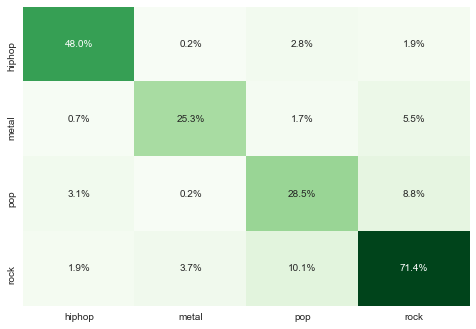

In [193]:
# Confusion Matrix

cnf = confusion_matrix(y_test_2, y_hat_2)/len(y_test)
target_label = unique_labels(y_test_2, y_hat_2)
sns.heatmap(cnf, xticklabels=target_label,
yticklabels=target_label, annot=True, fmt=".1%", cbar=False, cmap='Greens')

In [195]:
# Métricas asociadas al modelo 

print(classification_report(y_test_2, y_hat_2))

              precision    recall  f1-score   support

      hiphop       0.89      0.91      0.90      2011
       metal       0.86      0.76      0.81      1259
         pop       0.66      0.70      0.68      1537
        rock       0.82      0.82      0.82      3311

    accuracy                           0.81      8118
   macro avg       0.81      0.80      0.80      8118
weighted avg       0.81      0.81      0.81      8118



In [197]:
# Métricas asociadas al modelo anterior

print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

      hiphop       0.86      0.93      0.89      1041
       metal       0.83      0.71      0.76       609
         pop       0.63      0.42      0.51       504
        rock       0.77      0.85      0.81      1642

    accuracy                           0.79      3796
   macro avg       0.77      0.73      0.74      3796
weighted avg       0.79      0.79      0.78      3796



Para la métrica precision hubo una mejora en todos los géneros, asi también para el f1 y support. Considerando estos puntos, concluimos que el modelo nueivo presenta un mejor rendimiento al aportar mayor cantidad de datos para poder realizar predicciones correspondientemente.  